# NTNU Course - TFY4325/FY8904: Computational Physics (spring 2024)
## Assignment 2: The World of Quantum Mechanics

In this assignment we will study three different quantum mechanical systems, described by onedimensional Schrödinger equations. 

The first problem is the simple and well-known particle in a box, where we focus on scaling to dimensionless equations and comparing computational results to the exact
ones. 

The second problem describes a particle in a box with a potential barrier, where we do not have
many analytical results. 

In the third problem we learn how we can study a simple time-dependent quantum mechanical
platform. By considering a time-dependent Schr¨odinger equation for oscillating adjacent quantum wells
we find a time-dependent wavefunction that result in an integral equation. Finding the time-dependent
wavefunction, we predict the evolution of non-interacting particles that might exist in this system.

# 1. Particle in a box and dimensionless variables

The Schrödinger equation reads as follows

$$
i\hbar \frac{\partial}{\partial t}\Psi = \hat{H}\Psi
\tag{2.1}
$$
which is the baseline of quantum mechanics, describing how a system evolves in time. The system evolves according to a specific Hamilationian operator $\hat{H}$ for that exact system. The Hamiltonian represents the physical interaction that converts the initial state to the final state of the system.

The system we are looking at now is a singular particle in a box, subject to no interactions other than being in the box.

Given some initial condition $\Psi_0(x)=\Psi(x,t = 0)$, and a time independent Hamiltonian, we get a general solution

$$
\Psi = \Psi_0 e^{-\frac{it}{\hbar}\hat{H}} \tag{2.2}
$$

with the expontentional of the Hamiltionian operator being the shorthand way to write the series expansion of the exponential function. In other words, to make sense of taking the exponential of a linear operator, we actually mean:

$$
e^{-\frac{i}{\hbar} t \hat{H}} = 1 - \frac{i}{\hbar} t\hat{H}^1 + \frac{1}{2!} \left( \frac{i}{\hbar} t \hat{H}^2 \right)^2 - \dots 
$$

This equation describes the time evolution of the system, and requires the eigenfunctions $\psi_n$ of the Hamiltionian for it to be useful. They can be extracted through the time-independent Schrödinger equation

$$
\hat{H}\psi_n = E_n \psi_n \tag{2.3}
$$

$E_n$ being the energy of the state $\psi_n$.

We want to study a single particle with mass $m$ confined in some 2D box with walls at $x=0$, and $x=L$.

The boundary conditions required for the wave function when the particle is confined in the box can be found by examining the potential that describes the box

$$
V(x) = 
\begin{cases} 
0 & \text{for } 0 < x < L \\
\infty & \text{otherwise}.
\end{cases} \tag{2.4}
$$

Given this potential, the boundary conditions are derived from the requirement that the wave function must be continuous and the probability density must be zero at the boundaries of the box. Mathematically, this is expressed as

$$
\Psi(x=0, t) = 0, \Psi(x=L,t)=0
$$

Further, we can construct the Hamiltonian

$$
\hat{H} = -\frac{\hbar^2}{2m} \frac{\partial^2}{\partial x^2} + V(x), \tag{2.5}
$$

which means that Eqs. (2.1) and (2.3), the time-dependent and time-independent Schrödinger equations, read

$$
-\frac{\hbar^2}{2m} \frac{\partial^2 \Psi}{\partial x^2} = i\hbar \frac{\partial}{\partial t} \Psi \tag{2.6}
$$

and inside the box, we have

$$
-\frac{\hbar^2}{2m} \frac{\partial^2 \psi_n}{\partial x^2} = E_n \psi_n \tag{2.7}
$$

To implement numerical algorithms, we must make the equations dimensionless. We define $t' = t/t_0$ and $x'=x/x_0$, with $t_0$ and $x_0$ being time and position measured in with the new coordinates $t'$ and $x'$. Using the chain rule for differentiation on $\Psi(x,t'(t))$, we get a relation between $\frac{\partial \Psi}{\partial t}$ and $\frac{\partial \Psi}{\partial t'}$.

Time derivative:
$$
\frac{\partial}{\partial t} = \frac{\partial t'}{\partial t} \frac{\partial}{\partial t'} = \frac{1}{t_0}\frac{\partial}{\partial t'}
$$

Positional derivative:
$$
\frac{\partial}{\partial x}= \frac{\partial x'}{\partial x} \frac{\partial}{\partial x'} = \frac{1}{x_0} \frac{\partial}{\partial x'} \Rightarrow \frac{\partial^2}{\partial x^2} = \frac{1}{x_0^2} \frac{\partial^2}{\partial x'^2}
$$

Plugging the results into Schrödinger equation $(2.6)$, we get

$$
i\hbar \frac{1}{t_0} \frac{\partial \Psi}{\partial t'} = -\frac{\hbar^2}{2m} \frac{\partial^2\Psi}{\partial x^2}
$$

Choosing $x_0=L$

$$
i \frac{\hbar}{t_0} \frac{\partial \Psi}{\partial t'} = -\frac{\hbar^2}{2mL^2}\frac{\partial^2 \Psi}{\partial x'^2}
$$

We compare both sides and get that $t_0 = 2mL^2/ \hbar$. We end up with the final dimensionless Schrödinger equation

$$
i \frac{\partial \Psi}{\partial t'} = -\frac{\partial^2 \Psi}{\partial x'^2} \tag{2.8}
$$

With our new variables $t'=\frac{\hbar}{2mL^2} t$ and $x'=x/L$, we can rewrite the eigenvalue problem in Eq. $(2.7)$ to

$$
-\frac{\partial^2 \psi_n}{\partial x'^2} = \lambda_n \psi_n \tag{2.9}
$$

We also need to consider the fact that we just transformed our variables, and that the boundary conditions are also changed. With $x' = x/L$, we then get

$$
\Psi(x'=0, t') = 0, \Psi(x'=1, t') = 0
$$

It is now our first task to discretize the position $x'$ inside the box. We can then apply a finite difference scheme on Eq. $(2.9)$, to solve the matrix problem.

The code starts below, where we import necessary libraries.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

The exact and normalized solution of Eq. $(2.9)$ is given by

$$
\psi_n(x') = \sqrt2 \sin (n\pi x')
$$
for $n=1,2,3,\dots$ with the corresponding eigenvalues $\lambda_n = (\pi n )^2$

which we can simply plot below and then use to compare with our numerical solutions.

We make an array from $x'=0$ to $x'=1$ and plot for the first five eigenenergies.

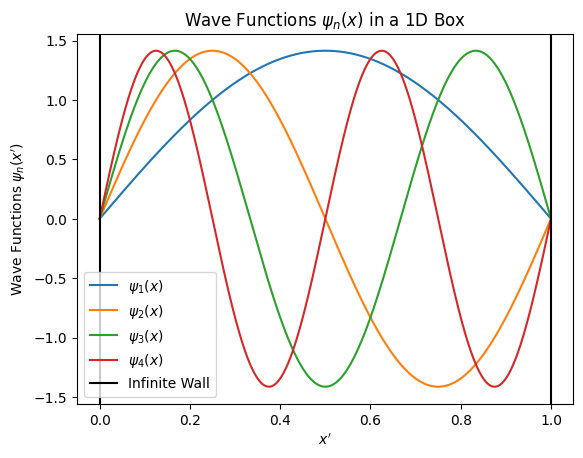

In [3]:
# Defining parameters
dx = 0.001 # stepsize
L = 1 # length of box
N = int(L/dx) # number of steps
x = np.arange(0, L, dx) # discretized position
n = [1,2,3,4] # n-th eigenvalue

# Analytical solution
def solution(n, x):
    return np.sqrt(2) * np.sin(n * np.pi * x)

# Initializing solution matrix 
psi_n = np.zeros((len(n), N))

# Fill the psi_n matrix with the solutions
for i, m in enumerate(n):
    psi_n[i, :] = solution(m, x)

# Plotting all wave functions
for i, n in enumerate(n):
    plt.plot(x, psi_n[i, :], label=rf"$\psi_{n}(x)$")

# Plotting the infinite walls
plt.axvline(x=0, color='k', label='Infinite Wall')
plt.axvline(x=1, color='k')

# Adding labels and title
plt.xlabel(rf'$x^\prime$')
plt.ylabel(rf"Wave Functions $\psi_n(x^\prime)$")
plt.title(rf"Wave Functions $\psi_n(x)$ in a 1D Box")
plt.legend()

# Display the plot
plt.show()

## How to approximate derivatives
We have discretisized the position $x^\prime$ inside the box. Applying a finite difference scheme on Eq. $(2.9)$, we get a matrix problem that we can solve for the second order derivative.

The function is only known at a set of discrete points $x_k$. Some notation is:

$$
x_k = x_{k-1}+h = x_0 + kh \\
f_k \equiv f(x_k) \\
f_{k+1} \equiv f(x_k + h)
$$

Forward difference approximation for 2nd order derivatives is given by

$$
\Delta _h f_k = f_{k+1} - f_k
$$

and higher-order differences are obtained by induction

$$
\Delta_h^n f(x_k) = \sum_{i=0}^n (-1)^i {n\choose i}f_{k+n-i} 
$$

Backwards differences are accordingly

$$
\nabla_h^nf(x_k) = \sum_{i=0}^n (-1)^i {n\choose i }f_{k-n+i}
$$

For Eq $(2.9)$, we have the forward difference of first order

$$
-\frac{\partial^2 \psi_n(x_k)}{\partial x^{\prime 2}} \approx \frac{\psi_{n,k+2}-2\psi_{n,k+1}+\psi_{n,k}}{h^2} = \lambda_n \psi_n
$$

From this we discretize the position $x'$ inside the box and apply the finite difference scheme on the emerging matrix problem which is the tridiagonal matrix

$$
\frac{1}{h^2} 
\begin{pmatrix}
-2 & 1 & 0 & 0 & \cdots & 0 & 0 \\
1 & -2 & 1 & 0 & \cdots & 0 & 0 \\
0 & 1 & -2 & 1 & \cdots & 0 & 0 \\
0 & 0 & 1 & -2 & \cdots & 0 & 0 \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & 0 & 0 & \cdots & -2 & 1 \\
0 & 0 & 0 & 0 & \cdots & 1 & -2 \\
\end{pmatrix} \begin{pmatrix}
\psi_1 \\
\psi_2 \\
\psi_3 \\
\psi_4 \\
\vdots \\
\psi_{N-1} \\
\psi_N \\
\end{pmatrix} = \lambda _n
\begin{pmatrix}
\psi_1 \\
\psi_2 \\
\psi_3 \\
\psi_4 \\
\vdots \\
\psi_{N-1} \\
\psi_N \\
\end{pmatrix}
$$

In [5]:
# Define the number of points N and the grid spacing h
N = 5  # Number of grid points
h = 0.1  # Grid spacing

# Create the tridiagonal matrix A
main_diag = -2 * np.ones(N)
off_diag = np.ones(N - 1)
A = (1 / h**2) * (np.diag(main_diag) + np.diag(off_diag, k=1) + np.diag(off_diag, k=-1))

# Compute the eigenvalues
eigenvalues = eigvals(A)

# Print the eigenvalues
print("Eigenvalues of the matrix are:")
print(eigenvalues)

Eigenvalues of the matrix are:
[-373.20508076+0.j  -26.79491924+0.j -100.        +0.j -200.        +0.j
 -300.        +0.j]
